In [74]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import numpy as np
from webagents_step.utils.llm import get_num_tokens
from matplotlib.ticker import FuncFormatter

In [75]:
srcdir_step = "../data/results_step/webarena"
logdirs_step = ["20240205-185838", "20240217-232912", "20240303-191438", "20240317-215516", "20240317-195557"]

model_name = "gpt-4-turbo-preview"

num_input_tokens_step=[]
for logdir in logdirs_step:
    folder_path = f"{srcdir_step}/{logdir}/reconstituted"
    for filename in os.listdir(folder_path):
        if not filename.endswith('.json'):
            continue
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
        
        for state in data['trajectory']:
            messages = state['prompt']
            input_text = " ".join([msg["content"] for msg in messages])
            num_input_token = get_num_tokens(input_text, model_name)
            num_input_tokens_step += [num_input_token]

In [76]:
srcdir_step = "../data/results_flat8k/webarena"
logdirs_step = ["20240320-231444"]
model_name = "gpt-4-turbo-preview"

num_input_tokens_flat8k=[]
for logdir in logdirs_step:
    folder_path = f"{srcdir_step}/{logdir}"
    for filename in os.listdir(folder_path):
        if not filename.endswith('.json'):
            continue
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
        
        for state in data['trajectory']:
            messages = state['prompt']
            input_text = " ".join([msg["content"] for msg in messages])
            num_input_token = get_num_tokens(input_text, model_name)
            num_input_tokens_flat8k += [num_input_token]

In [79]:
srcdir_step = "../data/results_step/webarena"
logdirs_step = ["20240205-185838", "20240217-232912", "20240303-191438", "20240317-215516", "20240317-195557"]

model_name = "gpt-4-turbo-preview"

num_input_tokens_step=[]
for logdir in logdirs_step:
    df = pd.read_csv(f"{srcdir_step}/{logdir}/summary.csv")
    folder_path = f"{srcdir_step}/{logdir}/reconstituted"
    for filename in os.listdir(folder_path):
        if not filename.endswith('.json'):
            continue
        
        task_id = int(filename.split('.')[0])
        if df.loc[df['task_id'] == task_id, 'success'].item() == 0:
            continue

        if df.loc[df['task_id'] == task_id, 'num_actions'].item() < 5:
            continue
        
        if df.loc[df['task_id'] == task_id, 'num_actions'].item() > 15:
            continue
        
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
        
        num_input_tokens_traj = 0
        for state in data['trajectory']:
            messages = state['prompt']
            input_text = " ".join([msg["content"] for msg in messages])
            num_input_tokens = get_num_tokens(input_text, model_name)
            num_input_tokens_traj = num_input_tokens_traj + num_input_tokens
        num_input_tokens_step += [num_input_tokens_traj]

In [80]:
srcdir_step = "../data/results_flat8k/webarena"
logdirs_step = ["20240320-231444","20240323-194242","20240324-122240"]
model_name = "gpt-4-turbo-preview"

num_input_tokens_flat8k=[]
for logdir in logdirs_step:
    df = pd.read_csv(f"{srcdir_step}/{logdir}/summary.csv")
    folder_path = f"{srcdir_step}/{logdir}"
    for filename in os.listdir(folder_path):
        if not filename.endswith('.json'):
            continue
        
        task_id = int(filename.split('.')[0])
        if df.loc[df['task_id'] == task_id, 'success'].item() == 0:
            continue

        if df.loc[df['task_id'] == task_id, 'num_actions'].item() < 5:
            continue
                
        if df.loc[df['task_id'] == task_id, 'num_actions'].item() > 15:
            continue
        
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
        
        num_input_tokens_traj = 0
        for state in data['trajectory']:
            messages = state['prompt']
            input_text = " ".join([msg["content"] for msg in messages])
            num_input_tokens = get_num_tokens(input_text, model_name)
            num_input_tokens_traj = num_input_tokens_traj + num_input_tokens
        num_input_tokens_flat8k += [num_input_tokens_traj]

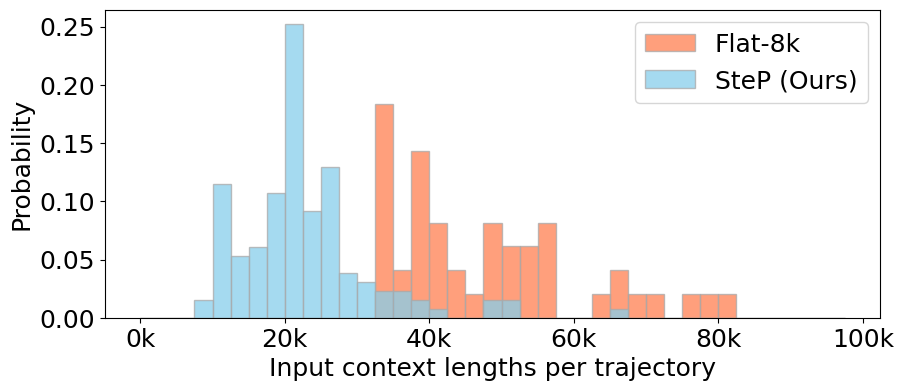

In [81]:
# Plotting the histogram
plt.figure(figsize=(10, 4))
plt.rc('font', size=18)

bin_edges = np.arange(0, 100000, 2500)

weights_flat8k = np.ones_like(num_input_tokens_flat8k) / len(num_input_tokens_flat8k)
plt.hist(num_input_tokens_flat8k, bins=bin_edges, weights=weights_flat8k, alpha=0.75, color='coral', edgecolor='darkgray', label='Flat 8k')
weights_step = np.ones_like(num_input_tokens_step) / len(num_input_tokens_step)
plt.hist(num_input_tokens_step, bins=bin_edges, weights=weights_step, alpha=0.75, color='skyblue', edgecolor='darkgray', label='SteP')

# Formatter function
def to_k(x, pos):
    'The two args are the value and tick position'
    return '%1.0fk' % (x * 1e-3)
formatter = FuncFormatter(to_k)
plt.gca().xaxis.set_major_formatter(formatter)

plt.legend(['Flat-8k', 'SteP (Ours)'], title='', fontsize=18)

# plt.title('Categorical Distribution Histogram')
plt.xlabel('Input context lengths per trajectory')
plt.ylabel('Probability')
# plt.grid(axis='y', alpha=0.75)

# Show plot
plt.show()